---
## **SPRINT 2**

**Machine Learning Application and Comparison**

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('loan_prediction.csv') 
data=train_data.copy()
data=data.rename(columns={'Self_Employed':'Employment','Married':'Marital_Status'})
data.drop(columns=['Loan_ID'],inplace=True)
data.head()

,Gender,Marital_Status,Dependents,Education,Employment,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.Gender.fillna(data.Gender.mode()[0],inplace=True)
data.Marital_Status.fillna(data.Marital_Status.mode()[0],inplace=True)
data.Dependents.fillna(data.Dependents.mode()[0],inplace=True)
data.Employment.fillna(data.Employment.mode()[0],inplace=True)
data.LoanAmount.fillna(value=data.LoanAmount.median(),inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.median(),inplace=True)
data.Credit_History.fillna(data.Credit_History.mode()[0],inplace=True)

In [5]:
data.isna().sum()

Gender               0
Marital_Status       0
Dependents           0
Education            0
Employment           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term'>

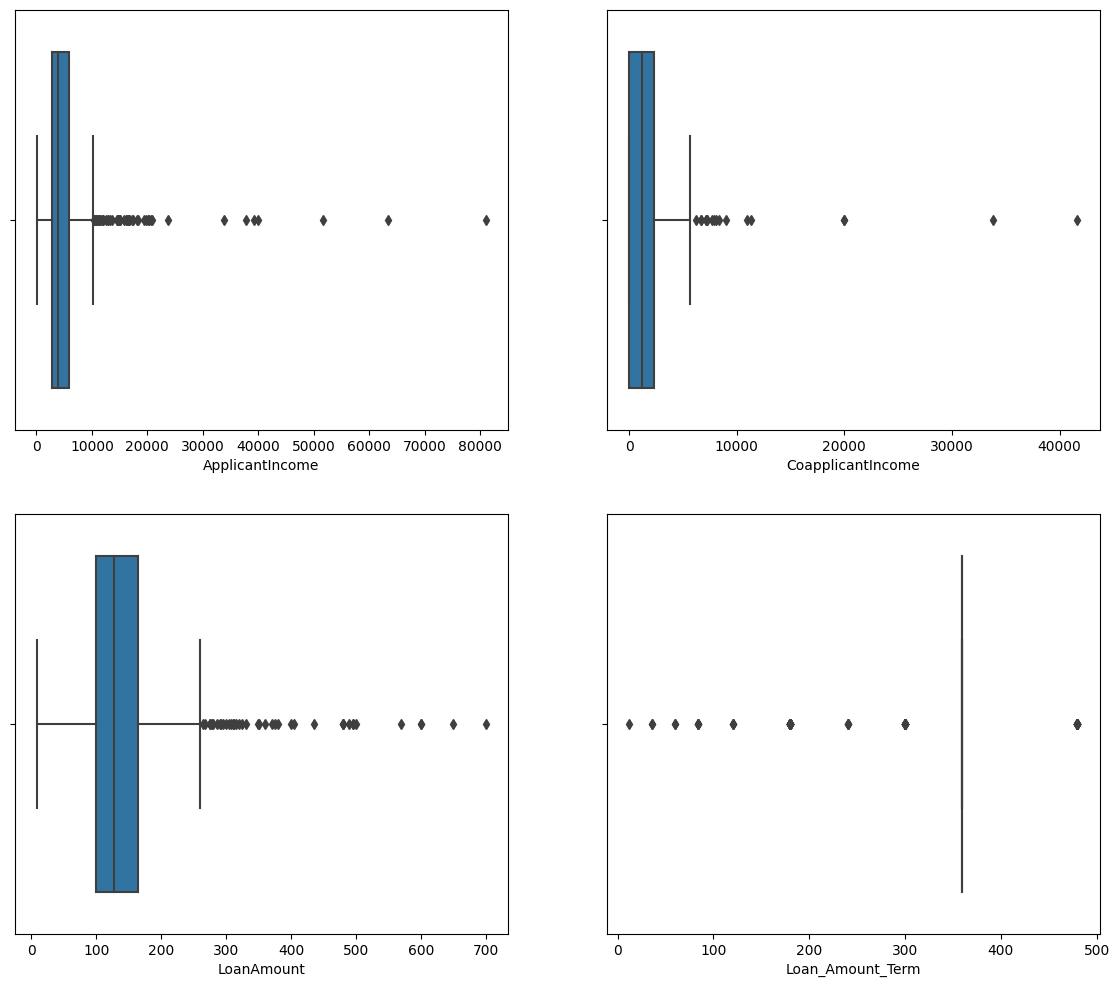

In [6]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.boxplot(data=data,x='ApplicantIncome')
plt.subplot(2,2,2)
sns.boxplot(data=data,x='CoapplicantIncome')
plt.subplot(2,2,3)
sns.boxplot(data=data,x='LoanAmount')
plt.subplot(2,2,4)
sns.boxplot(data=data,x='Loan_Amount_Term')

<AxesSubplot:xlabel='ApplicantIncome'>

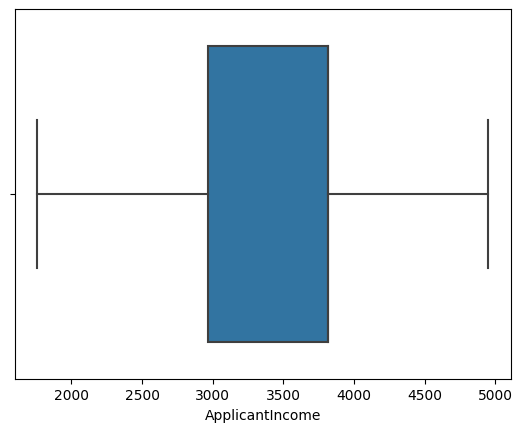

In [7]:
q1=data.ApplicantIncome.quantile(0.27)
q3=data.ApplicantIncome.quantile(0.49)
IQR=q3-q1
upper_lim=q3 + 1.5 * IQR
lower_lim=q1 -1.5 * IQR
data.ApplicantIncome=np.where(data.ApplicantIncome > upper_lim,data.ApplicantIncome.median(),data.ApplicantIncome)
data.ApplicantIncome=np.where(data.ApplicantIncome < lower_lim,data.ApplicantIncome.median(),data.ApplicantIncome)
sns.boxplot(data=data,x='ApplicantIncome')

<AxesSubplot:xlabel='CoapplicantIncome'>

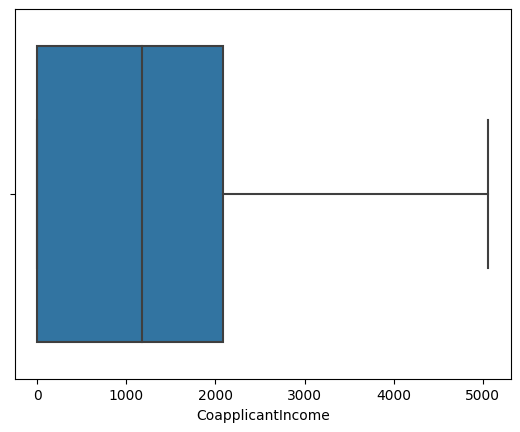

In [8]:
q1=data.CoapplicantIncome.quantile(0.25)
q3=data.CoapplicantIncome.quantile(0.71)
IQR=q3-q1
upper_lim=q3 + 1.5 * IQR
data.CoapplicantIncome=np.where(data.CoapplicantIncome > upper_lim,data.CoapplicantIncome.median(),data.CoapplicantIncome)
sns.boxplot(data=data,x='CoapplicantIncome')

<AxesSubplot:xlabel='LoanAmount'>

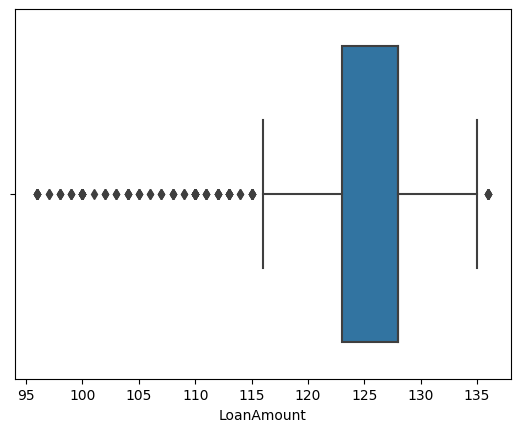

In [9]:
q1=data.LoanAmount.quantile(0.20)
q3=data.LoanAmount.quantile(0.60)
data.LoanAmount=np.where(data.LoanAmount > q3,data.LoanAmount.median(),data.LoanAmount)
data.LoanAmount=np.where(data.LoanAmount < q1,data.LoanAmount.median(),data.LoanAmount)
sns.boxplot(data=data,x='LoanAmount')

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)
data.Marital_Status=le.fit_transform(data.Marital_Status)
data.Dependents=le.fit_transform(data.Dependents)
data.Education=le.fit_transform(data.Education)
data.Employment=le.fit_transform(data.Employment)
data.Property_Area=le.fit_transform(data.Property_Area)
data.Loan_Status=le.fit_transform(data.Loan_Status)

In [11]:
x=data.drop(columns=['Loan_Status'])
y=data.Loan_Status
from sklearn.preprocessing import scale
x_scaled=pd.DataFrame(scale(x),columns=x.columns)
x_scaled.head()

,Gender,Marital_Status,Dependents,Education,Employment,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.491775,-0.912834,0.476889,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,1.559202,0.219569,0.476889,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.633838,-0.912834,0.476889,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-1.211537,0.857860,-0.396193,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.491775,-0.912834,0.476889,0.273231,0.411733,1.223298


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=3)
train_test_shape={'x_train':x_train.shape,'x_test':x_test.shape,'y_train':y_train.shape,'y_test':y_test.shape}
pd.Series(train_test_shape)

x_train    (429, 11)
x_test     (185, 11)
y_train       (429,)
y_test        (185,)
dtype: object

## Application of ML models

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,precision_score,classification_report

In [14]:
y_train=y_train.map({1:'Y',0:'N'})
y_test=y_test.map({1:'Y',0:'N'})

## 1. Decision Tree Classification Algorithm

In [15]:
d_tree_cls=DecisionTreeClassifier(criterion="entropy",random_state=12,max_depth=2,min_samples_leaf=10)
d_tree_cls.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10,
                       random_state=12)

In [16]:
y_predict_dtree_train=d_tree_cls.predict(x_train)
y_predict_dtree_train

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [17]:
y_predict_dtree=d_tree_cls.predict(x_test)
y_predict_dtree

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N

In [20]:
dtree_train_acc_score=accuracy_score(y_train,y_predict_dtree_train)*100
dtree_test_acc_score=accuracy_score(y_test,y_predict_dtree)*100
print("Training Accuracy Score: {}\nTraining Accuracy Score: {}".format(dtree_train_acc_score,dtree_test_acc_score))

Training Accuracy Score: 79.02097902097903
Training Accuracy Score: 85.4054054054054


In [52]:
pd.crosstab(y_test,y_predict_dtree)

col_0,N,Y
Loan_Status,,
N,21,24
Y,3,137


In [53]:
dtree_cls_report=classification_report(y_test,y_predict_dtree)
print(dtree_cls_report)

              precision    recall  f1-score   support

           N       0.88      0.47      0.61        45
           Y       0.85      0.98      0.91       140

    accuracy                           0.85       185
   macro avg       0.86      0.72      0.76       185
weighted avg       0.86      0.85      0.84       185



## Random Forest Classification Algorithm

In [22]:
rf_cls=RandomForestClassifier(n_estimators=100,random_state=5,max_depth=6)
rf_cls.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, random_state=5)

In [23]:
y_rf_train_predict=rf_cls.predict(x_train)
y_rf_train_predict

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [24]:
y_rf_test_predict=rf_cls.predict(x_test)
y_rf_test_predict

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N

In [26]:
rf_train_acc_score = accuracy_score(y_train,y_rf_train_predict)*100
rf_test_acc_score = accuracy_score(y_test,y_rf_test_predict)*100
print("Training Accuracy Score: {}\nTraining Accuracy Score: {}".format(rf_train_acc_score,rf_test_acc_score))

Training Accuracy Score: 81.81818181818183
Training Accuracy Score: 84.86486486486487


In [27]:
pd.crosstab(y_test,y_rf_test_predict)

col_0,N,Y
Loan_Status,,
N,21,24
Y,4,136


In [28]:
print(classification_report(y_test,y_rf_test_predict))

              precision    recall  f1-score   support

           N       0.84      0.47      0.60        45
           Y       0.85      0.97      0.91       140

    accuracy                           0.85       185
   macro avg       0.84      0.72      0.75       185
weighted avg       0.85      0.85      0.83       185



## KNN Classification Algorithm

In [29]:
knn_cls=KNeighborsClassifier(n_neighbors=12,p=2,metric='euclidean')
knn_cls.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

In [30]:
y_train_knn_predict=knn_cls.predict(x_train)
y_train_knn_predict

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [31]:
y_test_knn_predict=knn_cls.predict(x_test)
y_test_knn_predict

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N

In [32]:
knn_train_acc_score=accuracy_score(y_train,y_train_knn_predict)*100
knn_test_acc_score=accuracy_score(y_test,y_test_knn_predict)*100
print("Training Accuracy Score: {}\nTraining Accuracy Score: {}".format(knn_train_acc_score,knn_test_acc_score))

Training Accuracy Score: 79.48717948717949
Training Accuracy Score: 83.24324324324324


## Xgboost Classification Algorithm

In [33]:
y_train=y_train.map({'Y':1,'N':0})
y_test=y_test.map({'Y':1,'N':0})
y_train.value_counts(),y_test.value_counts()

(1    282
 0    147
 Name: Loan_Status, dtype: int64,
 1    140
 0     45
 Name: Loan_Status, dtype: int64)

In [34]:
xgBoost_cls = xgb.XGBClassifier(objective='binary:logistic',seed=42,random_state=6,max_depth=7)
model=xgBoost_cls.fit(x_train,
                y_train,
                verbose=True,
                early_stopping_rounds=10,
                eval_metric='aucpr',
                eval_set=[(x_test,y_test)])

C:\Users\balak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\balak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.83132
[1]	validation_0-aucpr:0.84068
[2]	validation_0-aucpr:0.83952
[3]	validation_0-aucpr:0.87617
[4]	validation_0-aucpr:0.87659
[5]	validation_0-aucpr:0.87605
[6]	validation_0-aucpr:0.86871
[7]	validation_0-aucpr:0.86363
[8]	validation_0-aucpr:0.85935
[9]	validation_0-aucpr:0.86158
[10]	validation_0-aucpr:0.86529
[11]	validation_0-aucpr:0.87591
[12]	validation_0-aucpr:0.87878
[13]	validation_0-aucpr:0.88260
[14]	validation_0-aucpr:0.88197
[15]	validation_0-aucpr:0.88344
[16]	validation_0-aucpr:0.88776
[17]	validation_0-aucpr:0.88449
[18]	validation_0-aucpr:0.88513
[19]	validation_0-aucpr:0.88796
[20]	validation_0-aucpr:0.88908
[21]	validation_0-aucpr:0.88804
[22]	validation_0-aucpr:0.89094
[23]	validation_0-aucpr:0.88884
[24]	validation_0-aucpr:0.88914
[25]	validation_0-aucpr:0.89157
[26]	validation_0-aucpr:0.89283
[27]	validation_0-aucpr:0.89344
[28]	validation_0-aucpr:0.89226
[29]	validation_0-aucpr:0.89125
[30]	validation_0-aucpr:0.89069
[31]	validation_0-

In [35]:
y_pred_xgb_train=model.predict(x_train)
y_pred_xgb_train

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [36]:
y_pred_xgb=xgBoost_cls.predict(x_test)
y_pred_xgb

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1])

In [37]:
Xgboost_train__acc_score=accuracy_score(y_train,y_pred_xgb_train)*100
Xgboost_test_acc_score=accuracy_score(y_test,y_pred_xgb)*100
print("Training Accuracy Score: {}\nTraining Accuracy Score: {}".format(Xgboost_train__acc_score,Xgboost_test_acc_score))

Training Accuracy Score: 94.4055944055944
Training Accuracy Score: 77.83783783783784


pd.crosstab(y_test,y_pred_xgb)

In [40]:
metrics={
    'Algorithm Name':['Decision Tree Algo','Random Forest Algo','KNN Algo','XgBoost Algo',],
    'Training Accuracy Score':[dtree_train_acc_score,rf_train_acc_score,knn_train_acc_score,Xgboost_train__acc_score],
    'Testing Accuracy Score':[dtree_test_acc_score,rf_test_acc_score,knn_test_acc_score,Xgboost_test_acc_score],
    }
pd.DataFrame(metrics)

,Algorithm Name,Training Accuracy Score,Testing Accuracy Score
0,Decision Tree Algo,79.020979,85.405405
1,Random Forest Algo,81.818182,84.864865
2,KNN Algo,79.487179,83.243243
3,XgBoost Algo,94.405594,77.837838


Random forest performs well in terms of all metrics of classification algorithm
So we can use this model to implement flask application